In [1]:
import mne 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy

In [33]:
#Load unshuffled acc
subjects = ['sub05','sub06', 'sub07', 'sub08','sub09','sub10','sub11','sub12','sub13','sub14','sub15','sub16',
'sub18','sub19','sub20','sub21','sub22','sub23', 'sub25', 'sub26', 'sub27', 'sub28', 'sub29', 'sub30', 
'sub31', 'sub32', 'sub33', 'sub34', 'sub35', 'sub36', 'sub37', 'sub38', 'sub39', 'sub40', 'sub41', 'sub42', 'sub43', 
'sub44', 'sub45', 'sub46', 'sub47', 'sub48', 'sub49', 'sub50', 'sub51', 'sub52', 'sub53', 'sub55', 'sub56', 
'sub57', 'sub58', 'sub59', 'sub60', 'sub61', 'sub62',  
'sub64', 'sub65', 'sub66', 'sub67', 'sub68', 'sub69', 'sub70', 'sub72']


acctr = []
for subject in subjects:
    print(subject)
    acc_unshuff = pd.read_csv("../trf_results/{s}/fits_acoustic_{s}_within_nb_stan_notr.csv".format(s=subject))
    
    acc_shuff = []
    feats = ['ac_target', 'ac_dis', 'onsets_target', 'onsets_dis']
    #Load shuffled acc
    numit = 50
    for feat in feats:
        for it in range(0,numit):
            shuff = pd.read_csv("../trf_results/{s}/shuffle/fits_acoustic_{s}_{i}_{f}_within_nb_stan_notr.csv".format(s = subject, i = it, f = feat))
            shuff['subject'] = subject
            acc_shuff.append(shuff)
    
    acc_shuff = pd.concat(acc_shuff)
    
    acc_shuff = acc_shuff.groupby(['trialnum', 'channel','feature_shuffle', 'subject'], as_index = False, sort = False).mean('fit')              
    acc_shuff['feature'] = acc_shuff['feature_shuffle']
    
    #Merge 
    accmere = pd.merge(acc_unshuff, acc_shuff, on = ['subject', 'trialnum', 'channel'])
    accmere['correlation'] = accmere['fit_x'] - accmere['fit_y'] 

    acctr.append(accmere)

sub05
sub06
sub07


KeyboardInterrupt: 

In [ ]:
acctr = pd.concat(acctr)
dfl=acctr.copy()
dfl = dfl.groupby(['subject', 'channel', 'feature_shuffle'], as_index = False, sort = False).mean('correlation')
dfl['feat'] = dfl['feature_shuffle']

Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 61
Clustering.
Using a threshold of 1.669804
stat_fun(H1): min=5.290256781363576 max=11.238925041564405
Running initial clustering …
Found 1 cluster


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

(array([[10.51224958,  9.95624768,  9.00551686, 10.33971564, 10.30621721,
        10.91880962, 10.33075412, 11.13458121, 10.26124426, 10.61516646,
         9.61882959, 10.43332795,  9.75375874, 10.41694989,  9.4147777 ,
        10.01114847,  8.74096401, 10.00422776, 10.82410927, 10.034269  ,
        10.72295353, 10.9020139 , 11.22912489,  9.59621355, 10.37770167,
         9.43842945, 10.50201548, 11.23892504, 10.52719818, 10.71907863,
        10.69318739, 10.3764957 , 11.10970586, 10.81496022,  9.99193117,
        10.14969079, 10.62611897, 10.42998126, 11.16708866,  9.96438247,
         7.94419244,  6.02378568,  7.26556622,  9.86649435,  8.83538192,
         9.84995652,  8.43307285,  9.32144411,  7.54407316,  9.36632568,
         6.34029454,  8.6202748 ,  7.08776055,  8.38705429,  5.29025678,
         8.06393996,  9.16865041,  9.85713574, 10.52022128,  9.81309764,
         9.99346929]]), [(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0,

  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

(array([[11.45081084, 11.48809524,  9.28760398,  8.74752274, 11.08862769,
        11.99946941, 12.23262328, 12.79949351, 11.94289538, 11.62355719,
        11.27196054, 11.72679467, 11.37411354, 11.49203798, 11.14713229,
        10.45562687,  9.80310057, 11.31715622, 11.9163602 , 11.64123841,
        11.00114822, 11.63783346, 11.61591308, 11.06626559, 11.370768  ,
         8.89531272,  9.05133569, 11.98451331, 12.31533332, 12.02860221,
        12.36454873, 11.04803719, 11.59555106, 11.61932583,  8.29520557,
         8.98806685,  8.89356965,  8.83873865,  9.361521  , 11.26899716,
         6.1813354 ,  6.84644998,  6.80855012,  9.73546013,  9.97472238,
         9.63086778,  8.91964878,  8.71086483,  8.25988319,  6.56444488,
         6.49963542,  8.34409468,  8.2188205 ,  6.53670195,  6.36824204,
         8.35123482,  9.73247899,  8.5924207 ,  8.21104962,  7.63061629,
         6.12763733]]), [(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0,

  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

(array([[6.30042528, 5.7846463 , 6.55711097, 5.12439542, 6.22890591,
        6.51827561, 6.02282451, 6.61727492, 6.53263488, 8.49929257,
        7.68516163, 6.01196639, 6.42385338, 6.24557532, 6.3434484 ,
        5.92994543, 6.25156914, 5.8663887 , 5.96471828, 6.86589736,
        6.90970366, 7.47883379, 5.91600943, 6.80224742, 6.53060192,
        6.96115666, 5.98094936, 6.78723961, 6.02805341, 7.56895431,
        6.22238303, 8.28571033, 7.20358867, 5.97386402, 7.26903111,
        7.4380931 , 6.02611021, 5.27561984, 5.26688439, 6.5167778 ,
        3.97783343, 3.79768745, 3.04946276, 5.77226397, 5.95876047,
        5.5084093 , 6.07493524, 5.33029106, 5.77895933, 4.72506973,
        4.82671897, 5.77796179, 5.49451914, 4.08744307, 4.08771825,
        4.71365199, 5.44300476, 6.915792  , 8.89841216, 5.85004375,
        6.2967162 ]]), [(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

(array([[5.90982667, 7.51422084, 5.70989078, 6.56880067, 7.03216298,
        6.59520391, 7.06269344, 7.26299015, 7.82139206, 6.80417369,
        7.56503994, 5.72357867, 5.43276907, 5.65039812, 5.32166583,
        5.01157985, 5.25411389, 5.0116033 , 7.0631592 , 7.10873847,
        7.74157488, 7.2788405 , 8.06122682, 7.68560661, 8.8371962 ,
        6.45256027, 6.74722648, 7.1687538 , 8.17351923, 7.77530892,
        9.52927371, 7.87390536, 9.14876137, 7.09751184, 5.4411926 ,
        6.16212358, 5.86107987, 6.42342978, 6.48836649, 7.13733224,
        0.66064288, 1.9781551 , 1.62780697, 3.48071328, 3.67583736,
        3.39278739, 3.2963467 , 2.08538889, 2.36835774, 0.81607464,
        2.01632444, 1.5812884 , 1.9919371 , 0.21621571, 1.51943782,
        1.64754346, 3.72823202, 3.4244459 , 5.53294013, 2.20385635,
        4.10062303]]), [(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

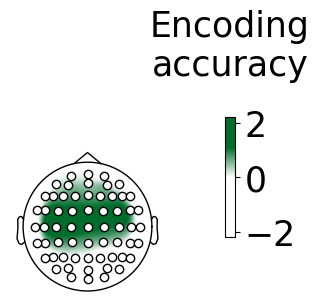

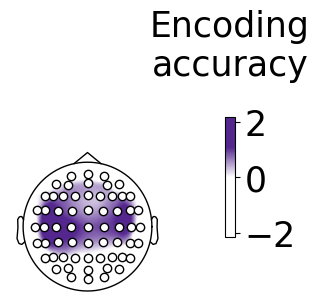

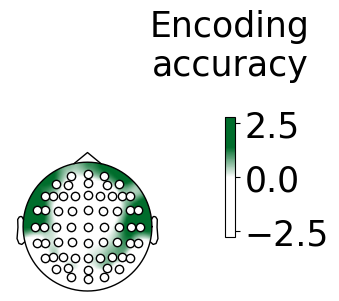

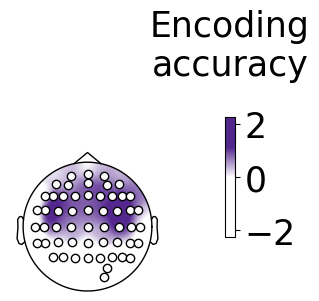

In [27]:
%run plotting_functions_within.ipynb

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as clr
import copy

cluster_dict = {}

feats = dfl['feat'].unique()

for feat in feats:
    plot_fits_clusters(feat)
    
    sname = "../figures/" + feat  + "_topo_within.svg"
    
    plt.savefig(sname, bbox_inches = "tight")

In [ ]:
sdf = acctr.groupby(['subject', 'feature_shuffle', 'trialnum'], as_index = False, sort = False).mean('correlation')
sdf = sdf[['subject', 'feature_shuffle', 'trialnum', 'correlation']]
sdf.to_csv('../statistics/fits_ac_within.csv')